In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
import seaborn as sns

In [3]:
import statsmodels.regression.quantile_regression as QuantReg

In [5]:
file = "https://mheaton.byu.edu/Courses/Stat469/Topics/1%20-%20Independence/1%20-%20IID/InClassCaseStudy/Data/BirthWeights.txt"
weight = pd.read_table(file, sep = ' ')

In [6]:
weight.head()

,BirthWeight,Mage,Gage,Race,Gen
0,3026.97,23,39,white,Male
1,3233.11,36,39,white,Female
2,2644.39,36,38,hisp,Male
3,4000.45,23,42,white,Male
4,3281.49,28,38,white,Female


In [7]:
weight.corr()

,BirthWeight,Mage,Gage
BirthWeight,1.000000,-0.053745,0.746965
Mage,-0.053745,1.000000,0.002826
Gage,0.746965,0.002826,1.000000


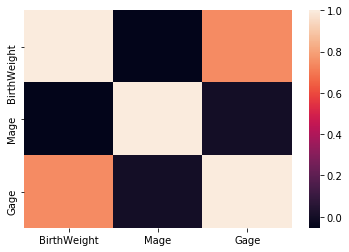

In [8]:
sns.heatmap(weight.corr())

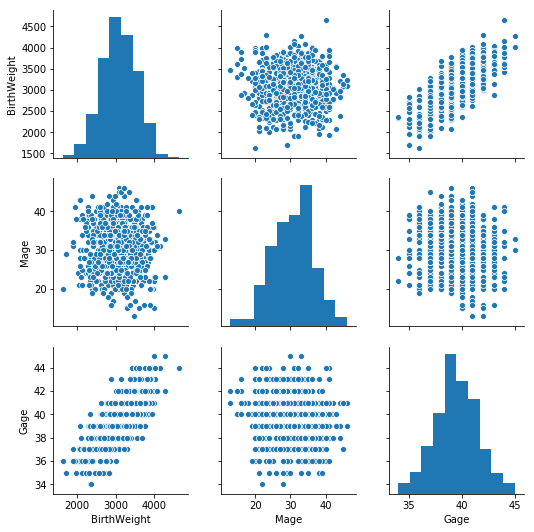

In [10]:
sns.pairplot(weight)

In [11]:
# make qunatile reg model 
quant_mod = smf.quantreg('BirthWeight ~ Mage + Gage + C(Race) + C(Gen)', data = weight).fit(q=.7)

/Users/JTBras/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [12]:
print(quant_mod.summary())

                         QuantReg Regression Results                          
Dep. Variable:            BirthWeight   Pseudo R-squared:               0.3655
Model:                       QuantReg   Bandwidth:                       144.6
Method:                 Least Squares   Sparsity:                        825.5
Date:                Thu, 21 Mar 2019   No. Observations:                  832
Time:                        12:59:30   Df Residuals:                      825
                                        Df Model:                            6
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3744.5085    289.748    -12.923      0.000   -4313.238   -3175.779
C(Race)[T.hisp]    165.2220     62.111      2.660      0.008      43.308     287.136
C(Race)[T.other]    86.0402     83.788      1.027      0.305     -78.422     250.502
C(Race)[T.white]   141

(array([  9.,  26.,  75., 138., 164., 177., 137.,  77.,  24.,   5.]),
 array([-978.26349999, -814.46167229, -650.6598446 , -486.8580169 ,
        -323.05618921, -159.25436151,    4.54746619,  168.34929388,
         332.15112158,  495.95294927,  659.75477697]),
 <a list of 10 Patch objects>)

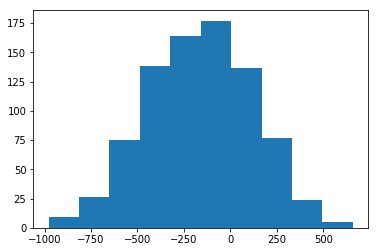

In [13]:
# check assumptions - normality
plt.hist(quant_mod.resid_pearson)

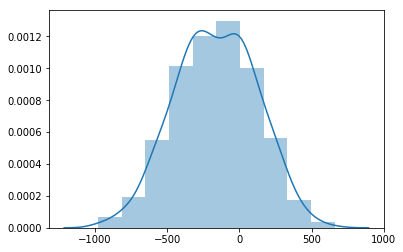

In [14]:
sns.distplot(quant_mod.resid_pearson, bins=10)

Text(0, 0.5, 'Std. resids')

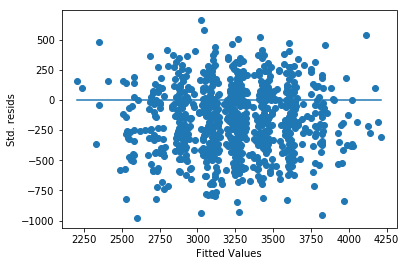

In [15]:
# check assumptions - equal variance 
plt.scatter(quant_mod.fittedvalues,quant_mod.resid_pearson)
plt.plot([quant_mod.fittedvalues.min(),quant_mod.fittedvalues.max()],[0,0])
plt.xlabel('Fitted Values')
plt.ylabel('Std. resids')

In [68]:
# create test data set
test_dat = weight.sample(frac=.4, random_state=101)
test_dat = test_dat.iloc[:, 1:5]


In [70]:
quant_mod.predict(test_dat).head(10)

182    3090.160500
269    3248.569500
820    3085.055000
360    3466.930501
55     3779.929001
830    3608.160500
668    3636.193501
347    3246.612500
157    3438.254500
295    3822.730000
dtype: float64

In [40]:
# try different quantile values and compare to OLS 
res_qr2 = smf.quantreg('BirthWeight ~ Mage + Gage + C(Race) + C(Gen)', data = weight).fit(.25)
res_qr3 = smf.quantreg('BirthWeight ~ Mage + Gage + C(Race) + C(Gen)', data = weight).fit(.75)
res_ols = smf.ols('BirthWeight ~ Mage + Gage + C(Race) + C(Gen)', data = weight).fit()


/Users/JTBras/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/Users/JTBras/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [56]:
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BirthWeight   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     211.9
Date:                Thu, 21 Mar 2019   Prob (F-statistic):          2.68e-163
Time:                        13:33:51   Log-Likelihood:                -5869.8
No. Observations:                 832   AIC:                         1.175e+04
Df Residuals:                     825   BIC:                         1.179e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4120.5424    218.050    -18.897      0.000   -4548.540   -3692.545
C(Race)[T.hisp]    198.7480     46.617      4.263      0.000     107.247     290.249
C(Race)[T.other]   241.5828     62.639      3.857      0.000     118.632     364.534
C(Race)[T.white]   204.8882     46.177      4.437      0.000     114.251     295.525
C(Gen)[T.Male]    -169.3486     19.677     -8.607      0.000    -207.971    -130.726
Mage                -3.7938      1.680     -2.259      0.024      -7.091      -0.497
Gage               182.7425      5.256     34.770      0.000     172.426     193.059
==============================================================================
Omnibus:                        8.877   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.067
Skew:                          -0.050   Prob(JB):                       0.0481
Kurtosis:                       2.594   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
res_qr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            BirthWeight   Pseudo R-squared:               0.3793
Model:                       QuantReg   Bandwidth:                       138.6
Method:                 Least Squares   Sparsity:                        867.5
Date:                Thu, 21 Mar 2019   No. Observations:                  832
Time:                        13:33:55   Df Residuals:                      825
                                        Df Model:                            6
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4584.9233    296.395    -15.469      0.000   -5166.700   -4003.146
C(Race)[T.hisp]    215.0248     63.581      3.382      0.001      90.226     339.824
C(Race)[T.other]   300.3733     84.614      3.550      0.000     134.289     466.458
C(Race)[T.white]   240.3698     63.000      3.815      0.000     116.710     364.030
C(Gen)[T.Male]    -175.2027     26.466     -6.620      0.000    -227.152    -123.253
Mage                -2.4050      2.289     -1.051      0.294      -6.897       2.087
Gage               187.7823      7.053     26.624      0.000     173.938     201.627
====================================================================================

The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
res_qr2.summary

/Users/JTBras/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            BirthWeight   Pseudo R-squared:               0.3793
Model:                       QuantReg   Bandwidth:                       138.6
Method:                 Least Squares   Sparsity:                        867.5
Date:                Thu, 21 Mar 2019   No. Observations:                  832
Time:                        13:32:55   Df Residuals:                      825
                                        Df Model:                            6
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4584.9233    296.395    -15.469      0.000   -5166.700   -4003.146
C(Race)[T.hisp]    215.0248     63.581      3.382      0.001      90.226     339.824
C(Race)[T.other]   300.3733     84.614      3.550      0.000     134.289     466.458
C(Race)[T.white]   240.3698     63.000      3.815      0.000     116.710     364.030
C(Gen)[T.Male]    -175.2027     26.466     -6.620      0.000    -227.152    -123.253
Mage                -2.4050      2.289     -1.051      0.294      -6.897       2.087
Gage               187.7823      7.053     26.624      0.000     173.938     201.627
====================================================================================

The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

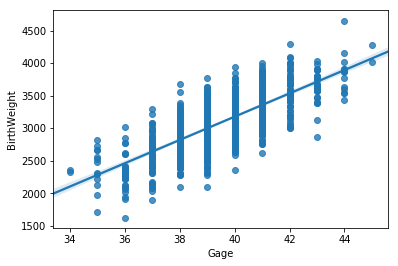

In [48]:
sns.regplot('Gage', 'BirthWeight', data = weight, ci = 95)